# Requirements

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
from scipy.stats import ppcc_max
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('blood_pressure_data.csv')
data = data.drop('id', axis=1)
data.sample(2)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
1533,NaN,NaN,50.0,74.0,NaN,159.0,NaN,58.0,93.0,13.1,1.0,0.8,33.0,16.0,18.0,No,116.0
3,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0


Explore the dataset using visualizations of your choice.

In [3]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum() / len(data) * 100

age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

In [4]:
data_imputed = data.copy()
today = pd.to_datetime('today')
data_imputed['age'] = pd.to_datetime(data_imputed['age'])
data_imputed['age'] = (today - data_imputed['age']).dt.days // 365


In [5]:
def label_data(data: pd.DataFrame, columns: list):
    encoder = LabelEncoder()
    data_copy = data.copy()

    for column in columns:
        data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

        if 'nan' in encoder.classes_:
            data_copy.loc[data_copy[column] == data_copy[column].max(), column] = np.nan
    return data_copy

In [6]:
encoder = LabelEncoder()
data_imputed = label_data(data_imputed, ['triglyceride', 'dental caries'])
data_imputed['triglyceride'].unique()

array([nan,  2.,  3.,  1.,  4.,  0.])

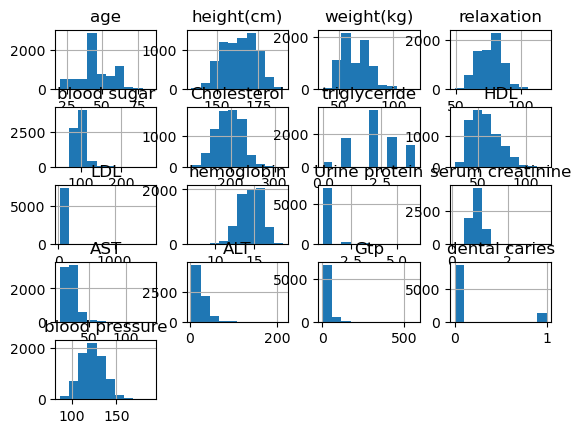

In [7]:
data_imputed.hist()
plt.show()


In [8]:
def knn_impute_data(data: pd.DataFrame, columns: list, n_neighbors: int):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data_copy = data.copy()

    for column in columns:
        data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
    return data_copy


In [9]:
data_imputed = data_imputed.dropna(subset=['blood pressure'], axis=0)


In [10]:
data_imputed = knn_impute_data(data_imputed,
                               ['age', 'height(cm)', 'weight(kg)', 'relaxation', 'blood sugar', 'Cholesterol',
                                'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                                'ALT', 'Gtp', 'triglyceride'], 10)


In [11]:
data_imputed.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

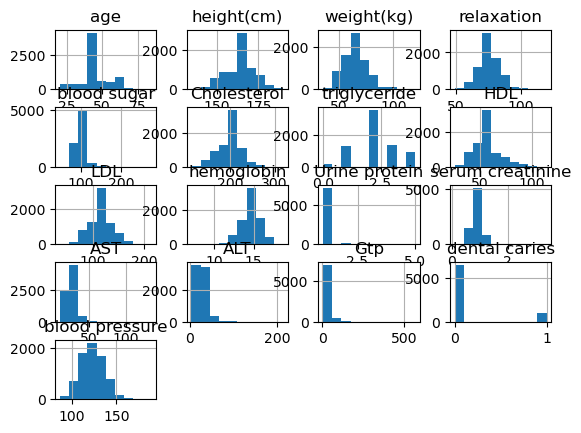

In [12]:
data_imputed.hist()
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [13]:
# Write your code here. Add as many boxes as you need.
X = data_imputed.drop('blood pressure', axis=1)
Y = data_imputed['blood pressure']

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, Y_train)
y_pred = rf_model.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
# Print out the results

# Calculate and print Relative MAE, Relative MSE, and Relative RMSE
print(f' Mean Absolute Error (MAE): {mae}')
print(f' Mean Squared Error (MSE): {mse}')
print(f' Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


 Mean Absolute Error (MAE): 7.817433155080215
 Mean Squared Error (MSE): 101.21576871657753
 Root Mean Squared Error (RMSE): 10.060604788807556
R-squared (R²): 0.41033268675774126


# Cross-Validation

In [15]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # learning rate options
    'n_estimators': [50, 100, 200],  # number of trees
    'max_depth': [3, 6, 10],  # depth of the trees
    'subsample': [0.7, 0.8, 1.0],  # fraction of samples used for each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # fraction of features used for each tree
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train_scaled, Y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [16]:
bestModel = grid_search.best_estimator_
y_pred = bestModel.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
# Print out the results

# Calculate and print Relative MAE, Relative MSE, and Relative RMSE
print(f' Mean Absolute Error (MAE): {mae}')
print(f' Mean Squared Error (MSE): {mse}')
print(f' Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


 Mean Absolute Error (MAE): 7.433547081156848
 Mean Squared Error (MSE): 94.94839690987898
 Root Mean Squared Error (RMSE): 9.744146802561986
R-squared (R²): 0.4468454193211301



Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.